**TRABAJO FINAL**

---

***UNIVERSIDAD DISTRITAL FRANCISCO JOSÉ DE CALDAS - FACULTAD TECNOLÓGICA***
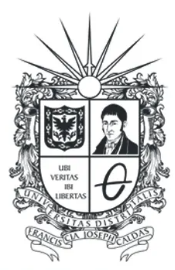
---



Erick Camilo Torres Rodriguez

20221579037

Esteban Mauricio Rodriguez

20221579046

*Teoria y logica de programación*

---


**INDICE PRESENTACIÓN 1**


Ejemplo 2


1.   Importación de librerias
2.   Importación de datos
3.   Filtrado por departamento
4.   Organización de datos
5.   Regresión lineal
6.   Regresión exponencial
7.   Regresión Logaritmica
8.   Comparación 



In [ ]:
import pandas as pd  # Importamos la biblioteca pandas para el manejo de datos tabulares
import numpy as np  # Importamos la biblioteca numpy para cálculos numéricos eficientes
import matplotlib.pyplot as plt  # Importamos la biblioteca matplotlib para crear gráficos
import statsmodels.api as sm  # Importamos la biblioteca statsmodels para realizar análisis estadísticos avanzados


In [ ]:
from google.colab import drive  # Importamos la biblioteca 'drive' de Google Colab para montar el drive en el entorno
drive.mount('/content/drive')  # Montamos el drive en la ruta '/content/drive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  # Importamos la biblioteca pandas para el manejo de datos tabulares

df = pd.read_excel("/content/drive/MyDrive/FINAL T&L/HURTO_PERSONAS.xlsx")  # Leemos un archivo Excel y lo asignamos a la variable 'df'

df.shape  # Imprimimos la forma (número de filas y columnas) del DataFrame 'df'


(11258, 4)

**VICHADA**

In [ ]:
df_VICHADA = df.loc[df['DEPARTAMENTO'] == 'VICHADA']
# Creamos un nuevo DataFrame llamado df_VICHADA que contiene solo las filas donde el valor en la columna 'DEPARTAMENTO' es 'VICHADA'

df_VICHADA_orden = df_VICHADA.sort_values('FECHA HECHO', ascending=True)
# Creamos un nuevo DataFrame llamado df_VICHADA_orden que contiene los datos de df_VICHADA ordenados por la columna 'FECHA HECHO' en orden ascendente


In [ ]:
print(df_VICHADA_orden)

   FECHA HECHO DEPARTAMENTO       MUNICIPIO  CANTIDAD
4   2023-01-09      VICHADA  PUERTO CARREÑO         1
3   2023-01-18      VICHADA  PUERTO CARREÑO         1
2   2023-01-20      VICHADA    LA PRIMAVERA         1
1   2023-01-23      VICHADA  PUERTO CARREÑO         1
0   2023-01-25      VICHADA  PUERTO CARREÑO         1
9   2023-02-04      VICHADA  PUERTO CARREÑO         1
8   2023-02-13      VICHADA  PUERTO CARREÑO         1
7   2023-02-16      VICHADA  PUERTO CARREÑO         1
6   2023-02-20      VICHADA    LA PRIMAVERA         1
5   2023-02-24      VICHADA  PUERTO CARREÑO         1
10  2023-03-03      VICHADA  PUERTO CARREÑO         1
11  2023-03-06      VICHADA  PUERTO CARREÑO         1
12  2023-03-13      VICHADA  PUERTO CARREÑO         1
13  2023-03-15      VICHADA  PUERTO CARREÑO         1
14  2023-03-16      VICHADA  PUERTO CARREÑO         1
15  2023-03-24      VICHADA  PUERTO CARREÑO         1
16  2023-03-26      VICHADA  PUERTO CARREÑO         1
17  2023-03-27      VICHADA 

MES
1     5
2     5
3    10
Name: CANTIDAD, dtype: int64


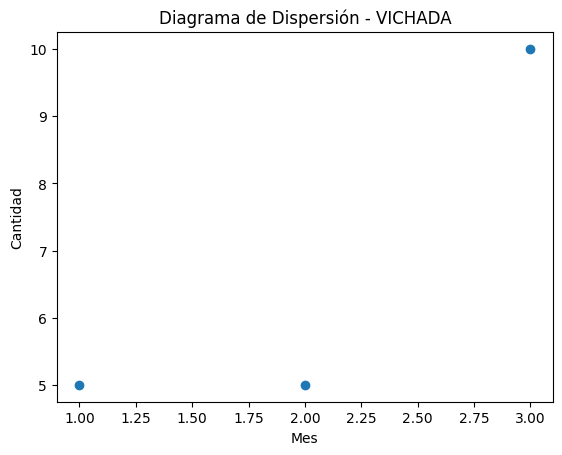

In [ ]:
# Convertir la columna 'FECHA HECHO' a tipo de datos datetime
df_VICHADA_orden['FECHA HECHO'] = pd.to_datetime(df_VICHADA['FECHA HECHO'])

# Crear una nueva columna 'MES' con el mes extraído de 'FECHA HECHO'
df_VICHADA_orden['MES'] = df_VICHADA_orden['FECHA HECHO'].dt.month

# Sumar los datos de 'CANTIDAD' por mes
suma_por_mes = df_VICHADA_orden.groupby('MES')['CANTIDAD'].sum()

print(suma_por_mes)
# Convertir suma_por_mes a un DataFrame
df = pd.DataFrame({'MES': suma_por_mes.index, 'CANTIDAD': suma_por_mes.values})

meses = suma_por_mes.index
cantidad = suma_por_mes.values

plt.scatter(meses, cantidad)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Diagrama de Dispersión - VICHADA')
plt.show()


*lINEAL*

Ecuación de regresión lineal: Cantidad = 1.67 + 2.50 * Mes
Coeficiente de determinación (R^2): 0.75
Varianza: 4.17


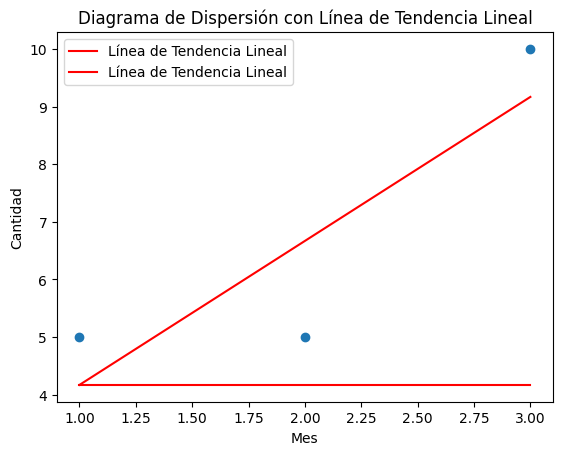

In [ ]:

# Definir las variables independientes (X) y dependiente (y)
X = df['MES']
y = df['CANTIDAD']

# Añadir una constante a X para estimar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal y ajustarlo a los datos
model = sm.OLS(y, X)
results = model.fit()

# Obtener los resultados de la regresión
intercepto = results.params[0]
pendiente = results.params[1]
r2 = results.rsquared
varianza = results.scale

# Imprimir los resultados
print("Ecuación de regresión lineal: Cantidad = {:.2f} + {:.2f} * Mes".format(intercepto, pendiente))
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))
print("Varianza: {:.2f}".format(varianza))

# Calcular los valores predichos de y usando la pendiente e intercepto
y_pred = intercepto + pendiente * X

# Crear el gráfico de dispersión con la línea de tendencia lineal
plt.scatter(X['MES'], y)
plt.plot(X['MES'], y_pred, color='red', label='Línea de Tendencia Lineal')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Diagrama de Dispersión con Línea de Tendencia Lineal')
plt.legend()
plt.show()

*EXPONENCIAL*

Ecuación de regresión exponencial: Cantidad = 1.67 * exp(2.50 * Mes)
Coeficiente de determinación (R^2): 0.25
Varianza: 4.17


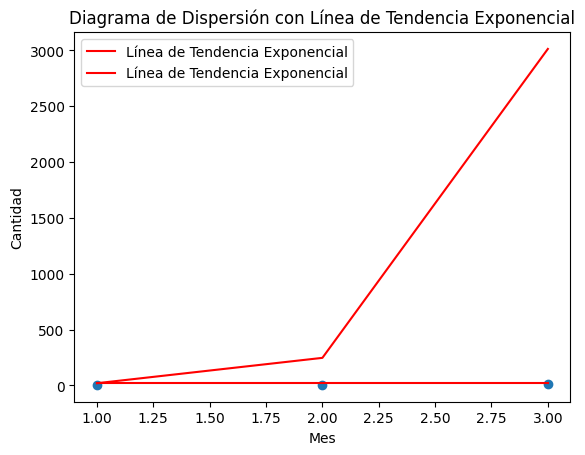

In [ ]:
# Definir las variables independientes (X) y dependiente (y)
X = df['MES']
y = df['CANTIDAD']

# Añadir una constante a X para estimar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión exponencial y ajustarlo a los datos
model = sm.GLM(y, X, family=sm.families.Gaussian())
results = model.fit()

# Obtener los resultados de la regresión
intercepto = results.params[0]
pendiente = results.params[1]
r2 = results.deviance / results.null_deviance
varianza = results.scale

# Imprimir los resultados
print("Ecuación de regresión exponencial: Cantidad = {:.2f} * exp({:.2f} * Mes)".format(intercepto, pendiente))
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))
print("Varianza: {:.2f}".format(varianza))

# Calcular los valores predichos de y usando la ecuación de la regresión exponencial
y_pred = intercepto * np.exp(pendiente * X)

# Crear el gráfico de dispersión con la línea de tendencia exponencial
plt.scatter(X['MES'], y)
plt.plot(X['MES'], y_pred, color='red', label='Línea de Tendencia Exponencial')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Diagrama de Dispersión con Línea de Tendencia Exponencial')
plt.legend()
plt.show()

*LOGARITMICA*

Ecuación de regresión logarítmica: Log(Cantidad) = 1.15 + 0.35 * Mes
Coeficiente de determinación (R^2): 0.75
Varianza: 0.08


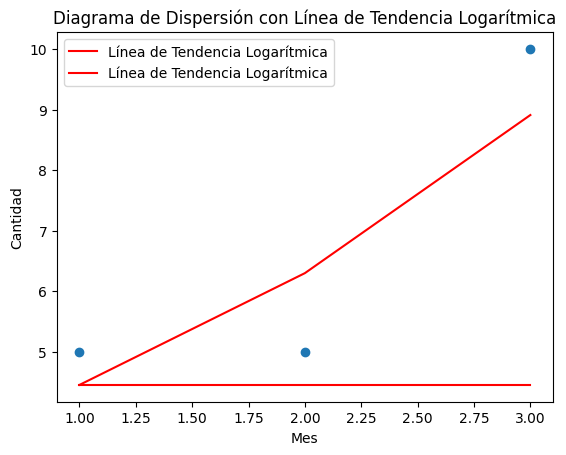

In [ ]:
# Aplicar una transformación logarítmica a la variable dependiente
df['LOG_CANTIDAD'] = np.log(df['CANTIDAD'])

# Definir las variables independiente (X) y dependiente (y)
X = df['MES']
y = df['LOG_CANTIDAD']

# Añadir una constante a X para estimar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión logarítmica y ajustarlo a los datos
model = sm.OLS(y, X)
results = model.fit()

# Obtener los resultados de la regresión
intercepto = results.params[0]
pendiente = results.params[1]
r2 = results.rsquared
varianza = results.mse_resid

# Imprimir los resultados
print("Ecuación de regresión logarítmica: Log(Cantidad) = {:.2f} + {:.2f} * Mes".format(intercepto, pendiente))
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))
print("Varianza: {:.2f}".format(varianza))

# Calcular los valores predichos de y usando la ecuación de la regresión logarítmica
y_pred = intercepto + pendiente * X

# Invertir la transformación logarítmica para obtener los valores predichos de CANTIDAD
y_pred_transformada = np.exp(y_pred)

# Crear el gráfico de dispersión con la línea de tendencia logarítmica
plt.scatter(X['MES'], df['CANTIDAD'])
plt.plot(X['MES'], y_pred_transformada, color='red', label='Línea de Tendencia Logarítmica')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Diagrama de Dispersión con Línea de Tendencia Logarítmica')
plt.legend()
plt.show()

***COMPARACIÓN***

In [ ]:
# Crear listas para almacenar los resultados de los modelos
modelos = ['Lineal', 'Exponencial', 'Logarítmica']
r2_scores = []

# Realizar los modelos y calcular los coeficientes de determinación (R^2)
for modelo in modelos:
    if modelo == 'Lineal':
        # Regresión lineal
        X = df['MES']
        y = df['CANTIDAD']
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        r2_scores.append(results.rsquared)
    elif modelo == 'Exponencial':
        # Regresión exponencial
        X = df['MES']
        y = df['CANTIDAD']
        X = sm.add_constant(X)
        model = sm.GLM(y, X, family=sm.families.Gaussian())
        results = model.fit()
        r2_scores.append(results.deviance / results.null_deviance)
    elif modelo == 'Logarítmica':
        # Regresión logarítmica
        X = df['MES']
        y = np.log(df['CANTIDAD'])
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        r2_scores.append(results.rsquared)

# Encontrar el modelo con el R^2 más alto
indice_mejor_modelo = np.argmax(r2_scores)
mejor_modelo = modelos[indice_mejor_modelo]
mejor_r2 = r2_scores[indice_mejor_modelo]

# Imprimir los resultados
print("Resultados de los modelos:")
for modelo, r2 in zip(modelos, r2_scores):
    print("{}: R^2 = {:.2f}".format(modelo, r2))
print("\nEl modelo más preciso es {} con un R^2 de {:.2f}".format(mejor_modelo, mejor_r2))

# Reemplazar la variable X con un valor de entrada
valor_x = float(input("Ingrese un valor para X: "))
if mejor_modelo == 'Lineal':
    y_pred = results.predict([1, valor_x])
elif mejor_modelo == 'Exponencial':
    y_pred = results.predict([1, valor_x])
    y_pred = np.exp(y_pred)
elif mejor_modelo == 'Logarítmica':
    y_pred = results.predict([1, valor_x])
    y_pred = np.exp(y_pred)

print("Predicción para X = {:.2f}: {:.2f}".format(valor_x, y_pred[0]))

Resultados de los modelos:
Lineal: R^2 = 0.75
Exponencial: R^2 = 0.25
Logarítmica: R^2 = 0.75

El modelo más preciso es Logarítmica con un R^2 de 0.75
Ingrese un valor para X: 6
Predicción para X = 6.00: 25.20
